# Learning Objectives 
+ What are activation Functions?
+ Types of activation functions in neural networks 
+ Most widely used activation functions 
+ How to choose an activation function for our analysis?
+ Coding activation functions in Python 
  + An activation function in a neural network defines how weighted sum of input is transformed into an output from a node or nodes in a layer of network.
     + Some times activation functions called as **transfer functions**.
     + If output of an activation function is limited it is called as a **squashing function**.
     + Some activation functions refferd non-linear and reffered non-linearity in neural networks.
# Types of Activation Functions 
+ 1. Linear Activation Function 
+ 2. Sigmoid Activation Function
+ 3. ReLU (Rectified Linear Unit) Activation Function
+ 4. TanH (Hyperbolic Tangent) Activation Function
+ 5. Softmax Activation Function
+ 6. Step Activation Function
# Why activation functions are used?
+ Tones of data is available 
  + Data is non-structured 
  + No defined line between useful and non-useful data 
  + Noisy data will not be required output 
    + Activation functions are the mathematical equations that determine the output  of a neural network. They help the network to use the important information and supress the noise.
    + In a neural network activation functions are ustilized to **bring non-linearities into descision border**. 
    + The goal of intoducing non-linearities in data is to **stimulate a real world situation**.
# A linear activation function turns the neural network into a one layer as output f(x)=x
# Binary step function is example of non-linear activation function
# Sigmoid function is also knnown as vanishing gradient 


In [1]:
import tensorflow as tf 

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels) ,(test_images, test_labels) = fashion_mnist.load_data() 

In [3]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data() 
assert X_train.shape == (60000, 28, 28) # 28, 28 is the length and width of the image
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,) # y_train is the label of the image
assert y_test.shape == (10000,)

In [4]:
# summarize tha load dataset 
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


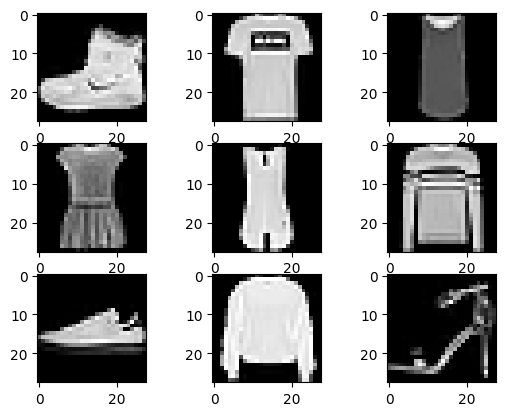

In [5]:
# plot first few images 
import matplotlib.pyplot as plt 
# use for loop 
for i in range(9):
    # define subplot 
    plt.subplot(330 + 1 + i)
    # plot raw pixel data 
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [6]:
# pre process the data
X_train= X_train/255.0
X_test = X_test/255.0
# we bring data in one scale 

In [7]:
# making artificial neural network model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu), # relu used as our value is between 0 to 1
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # softmax used as we have 10 classes multiclass classification
])

c:\Users\HP\miniconda3\envs\tf_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# compile th model 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # in metrics what we'll type that we'll get in the output
# train the model
model.fit(X_train, y_train, epochs=5)
# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.7799 - loss: 0.6276
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8632 - loss: 0.3878
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8782 - loss: 0.3362
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8862 - loss: 0.3089
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8934 - loss: 0.2904
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8716 - loss: 0.3558
Test accuracy: 0.8711000084877014


In [9]:
# make prediction with model 
predictions = model.predict(X_test) 
# print shape of prediction array
print(predictions.shape)
# print first 10 predictions
print(predictions[0:10])
# convert predictions to class labels
class_labels = [tf.argmax(prediction) for prediction in predictions]
# print first 10 class labels
print(class_labels[0:10])


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
(10000, 10)
[[1.7843315e-04 3.1834075e-05 6.5042666e-05 3.1498803e-05 2.9561339e-05
  1.5258319e-02 1.4179391e-04 2.8849082e-02 3.1172447e-03 9.5229721e-01]
 [5.2750765e-05 2.7631936e-10 9.6181941e-01 4.6583342e-09 1.0638858e-02
  2.3642498e-11 2.7488710e-02 1.6116266e-11 2.4094098e-07 1.6092835e-14]
 [4.2321902e-09 1.0000000e+00 1.0925173e-10 2.0239377e-09 1.4825002e-08
  1.8949902e-15 6.8004708e-12 3.3940759e-21 1.4307753e-13 3.4125664e-19]
 [5.5115816e-08 9.9999225e-01 3.5820996e-08 7.0282481e-06 6.8115344e-07
  3.4749638e-12 2.4456692e-09 2.0022097e-16 1.1918976e-11 7.4751620e-14]
 [9.8283485e-02 3.7139935e-07 3.4233276e-02 4.1839134e-04 4.2732344e-03
  1.9212300e-06 8.6263150e-01 1.0661024e-07 1.5769254e-04 6.6075337e-08]
 [6.8421664e-06 9.9999177e-01 7.8663085e-08 1.1699424e-07 1.1493806e-06
  7.6290580e-12 4.8223175e-08 1.6755385e-17 6.8691580e-11 8.3968467e-16]
 [1.1566203e-04 1.3078618e-06 4.4126366e-03 4.9683695e-07 9.8670268e-01
  3.7

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.8949 - loss: 0.2822 - val_accuracy: 0.8804 - val_loss: 0.3363
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.8996 - loss: 0.2703 - val_accuracy: 0.8738 - val_loss: 0.3597
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 14ms/step - accuracy: 0.9044 - loss: 0.2556 - val_accuracy: 0.8776 - val_loss: 0.3429
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.9080 - loss: 0.2469 - val_accuracy: 0.8770 - val_loss: 0.3546
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9119 - loss: 0.2368 - val_accuracy: 0.8836 - val_loss: 0.3315


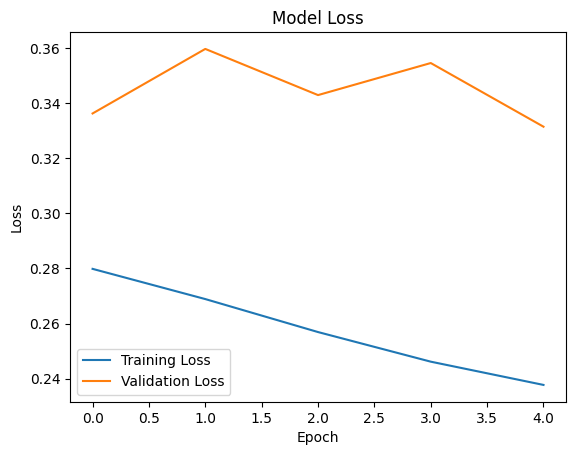

In [10]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')          
plt.plot(history.history['val_loss'], label='Validation Loss')    
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Difference between training, testing and validation loss

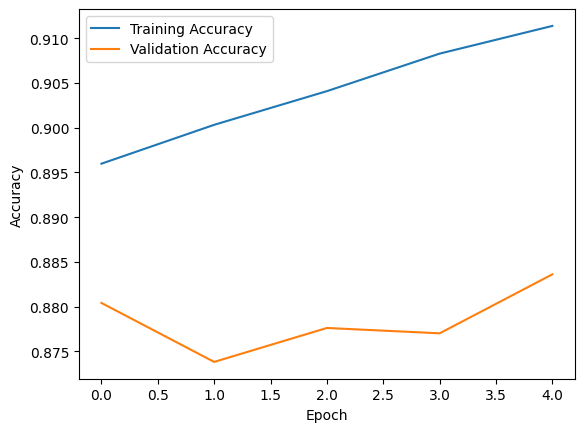

In [11]:
# plot training and validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()